In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

print("Choose from the selected options for Tag videos")
print("press 0 for Tag0")
print("press 1 for Tag1")
print("press 2 for Tag2")
print("press 3 for Multiple_tags")
print("")
a = int(input("Make your selection: "))
if a == 0:
    vcap = cv.VideoCapture('Tag0.mp4')
elif a == 1:
    vcap = cv.VideoCapture('Tag1.mp4')
elif a == 2:
    vcap = cv.VideoCapture('Tag2.mp4')
elif a == 3:
    vcap = cv.VideoCapture('multipleTags.mp4')
else:
    print("Wrong Selection, exiting code")
    exit(0)

Choose from the selected options for Tag videos
press 0 for Tag0
press 1 for Tag1
press 2 for Tag2
press 3 for Multiple_tags

Make your selection: 1


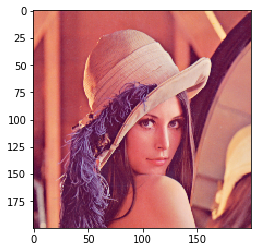

In [4]:
lena_img = cv.imread('Lena.png')
lena_resize = cv.resize(lena_img, (200, 200))
#plt.imshow(lena_resize)
plt.imshow(cv.cvtColor(lena_resize, cv.COLOR_BGR2RGB))

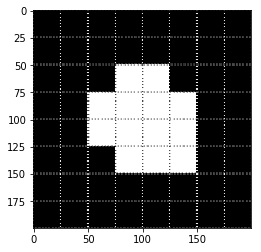

In [5]:
ar_tag = cv.imread('ref_marker_grid.png')
plt.imshow(ar_tag)

In [108]:
def tag_matrix(img):
    dimension = img.shape  
    h_img = dimension[0]
    #print(h_img)
    w_img = dimension[1]
    #print(w_img)
    bit_h = int(h_img/8)
    #print(bit_h)
    bit_w = int(w_img/8)
    #print(bit_w)
    a=0 
    ar_tag = np.empty((8,8))
    for i in range(0,h_img,bit_h):
        b=0
        for j in range(0,w_img,bit_w):
            count_black = 0
            count_white = 0   
            for x in range(0,bit_h-1):
                for y in range(0,bit_w-1):
                    if(img[i+x][j+y].all()==0):
                        count_black += 1
                    else:
                        count_white += 1
                        
            if(count_white >= count_black):
                ar_tag[a][b]=1
            else:
                ar_tag[a][b]=0
            b=b+1
        a=a+1
    return ar_tag

In [110]:
img = cv.imread('ref_marker_grid.png')
mtag=tag_matrix(img)
print(mtag)


[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


In [111]:
check_matrix1 = np.array([[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,1,1,1,0,0,0],[0,0,1,1,1,1,0,0],[0,0,1,1,1,1,0,0],[0,0,0,1,1,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0]])
print(check_matrix1)
check_matrix2 = np.array([[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,1,1,1,0,0],[0,0,1,1,1,1,0,0],[0,0,1,1,1,1,0,0],[0,0,0,1,1,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0]])
print(check_matrix2)

[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0]
 [0 0 1 1 1 1 0 0]
 [0 0 1 1 1 1 0 0]
 [0 0 0 1 1 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 0]
 [0 0 1 1 1 1 0 0]
 [0 0 1 1 1 1 0 0]
 [0 0 0 1 1 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


In [112]:
def tag_angle(ar_tag):

    # Checking the location of white in the inner 4X4 matrix of the AR tag to detect orientation of the tag in camera frame
    if(ar_tag[2][2].all() == 0 and ar_tag[2][5].all() == 0 and ar_tag[5][2].all() == 0 and ar_tag[5][5].all() == 1):
        angle_rotate = 0
        print(angle_rotate)
    elif(ar_tag[2][2].all() == 1 and ar_tag[2][5].all() == 0 and ar_tag[5][2].all() == 0 and ar_tag[5][5].all() == 0):
        angle_rotate = 180
        print(angle_rotate)
    elif(ar_tag[2][2].all() == 0 and ar_tag[2][5].all() == 1 and ar_tag[5][2].all() == 0 and ar_tag[5][5].all() == 0):
        angle_rotate = 90
        print(angle_rotate)
    elif(ar_tag[2][2].all() == 0 and ar_tag[2][5].all() == 0 and ar_tag[5][2].all() == 1 and ar_tag[5][5].all() == 0):
        angle_rotate = -90
        print(angle_rotate)
    else:
        angle_rotate = None
        print(angle_rotate)
        
    if (angle_rotate == None):
        return angle_rotate, False
    else:
        return angle_rotate, True

In [113]:
tag_angle(check_matrix2)

90


(90, True)

In [114]:
#Finding the Binary value of the  tag using the inner 2x2 matrix 
def tag_Id(image):

    tag_m = tag_matrix(image)

    angle_value , flag = tag_angle(tag_m)
    # Checking wheather the AR tag is detected or not. 
    if (flag == False):
        
        return flag , angle_value,None
    #Based on the orientation of the AR tag detected , the binary value of the AR tag is calculated    
    if(flag == True):
        if (angle_value == 0):
            Id = tag_matrix[3][3]*1 +tag_matrix[4][3]*8 +tag_matrix[4][4]*4 + tag_matrix[3][4]*2
        elif(angle_value == 90):
            Id = tag_matrix[3][3]*2 + tag_matrix[3][4]*4 + tag_matrix[4][4]*8 +tag_matrix[4][3]*1
        elif(angle_value == 180):
            Id = tag_matrix[3][3]*4 + tag_matrix[4][3]*2 + tag_matrix[4][4] + tag_matrix[3][4]*8
        elif(angle_value == -90):
            Id= tag_matrix[3][3]*8 + tag_matrix[3][4] + tag_matrix[4][4]*2 +tag_matrix[4][3]*4
        return flag, angle_value, Id

In [116]:
tag_Id(check_matrix2)

None


(False, None, None)